In [ ]:
# load data
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# modelling
import statsmodels.formula.api as smf

In [ ]:
def print_coef_std_err(results):
    """
    Function to combine estimated coefficients and standard error in one DataFrame
    :param results: <statsmodels RegressionResultsWrapper> OLS regression results from 
    :return df: <pandas DataFrame> 
    """
    coef = results.params
    std_err = results.bse
    
    df = pd.DataFrame(data = np.transpose([coef, std_err]), 
                      index = coef.index, 
                      columns=["coef","std err"])
    return df

In [ ]:
#load data

from google.colab import drive
drive.mount('/content/gdrive')

#define data path
data_path = '/content/gdrive/MyDrive/Pacmann Project Presentation/Dataset Cars Price Prediction/car_price_prediction.csv'

# membaca data dari data path dan menghapus data NaN
cars_price = pd.read_csv(data_path).dropna()

# tampilkan informasi data
cars_price.info()

Mounted at /content/gdrive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                19237 non-null  int64 
 1   Price             19237 non-null  int64 
 2   Manufacturer      19237 non-null  object
 3   Model             19237 non-null  object
 4   Prod. year        19237 non-null  int64 
 5   Category          19237 non-null  object
 6   Leather interior  19237 non-null  object
 7   Fuel type         19237 non-null  object
 8   Engine volume     19237 non-null  object
 9   Mileage           19237 non-null  object
 10  Cylinders         19237 non-null  int64 
 11  Gear box type     19237 non-null  object
 12  Drive wheels      19237 non-null  object
 13  Wheel             19237 non-null  object
 14  Color             19237 non-null  object
 15  Airbags           19237 non-null  int64 
dtypes: int64(5), object(11)
memory 

In [ ]:
# tampilkan data
cars_price.head()

,ID,Price,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
0,45654403,13328,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6,Automatic,4x4,Left wheel,Silver,12
1,44731507,16621,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6,Tiptronic,4x4,Left wheel,Black,8
2,45774419,8467,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4,Variator,Front,Right-hand drive,Black,2
3,45769185,3607,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4,Automatic,4x4,Left wheel,White,0
4,45809263,11726,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4,Automatic,Front,Left wheel,Silver,4


In [ ]:
cars_price.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


Mean of Price in samples = $18555.93
Standard deviation of Price in samples = $190576.32


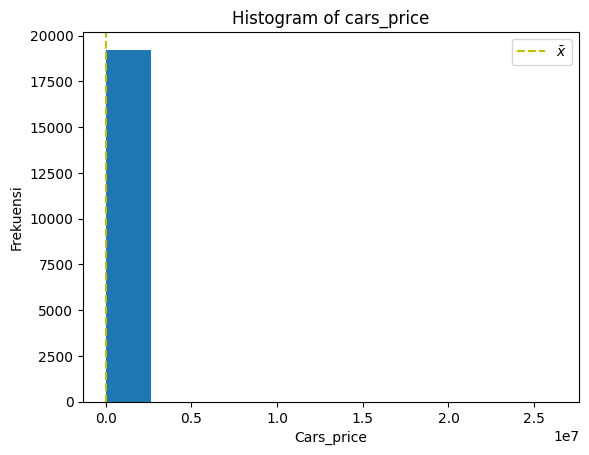

In [ ]:
plt.hist(cars_price["Price"])

mean_cars_price = np.mean(cars_price["Price"])
std_cars_price = np.std(cars_price["Price"])

print(f"Mean of Price in samples = ${np.round(mean_cars_price,2)}")
print(f"Standard deviation of Price in samples = ${np.round(std_cars_price,2)}")

plt.axvline(mean_cars_price, color ="y", linestyle = "--", label = r"$\bar{x}$")
plt.xlabel('Cars_price')
plt.ylabel('Frekuensi')
plt.title('Histogram of cars_price')
plt.legend()
plt.show()

Terlihat bahwa histogram yang kita miliki merupakan *skewed distribution* yang menunjukkan bahwa outlier mungkin ada dalam data. Kita perlu menghapus outlier terlebih dahulu dan kemudian mulai melakukan analisa.

#Data Cleaning

<Axes: >

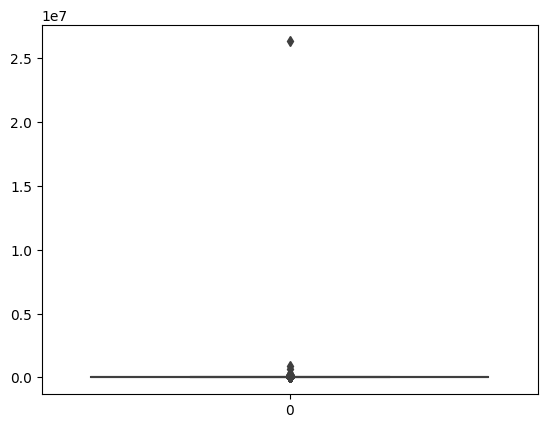

In [ ]:
sns.boxplot(cars_price["Price"])

In [ ]:
#remove outlier using IQR Method
q1 = cars_price["Price"].quantile(0.25)
q3 = cars_price["Price"].quantile(0.75)
iqr = q3-q1

print (q1,q3,iqr)

5331.0 22075.0 16744.0


In [ ]:
#setting the upper limit dan lower limit
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)

lower_limit, upper_limit

(-19785.0, 47191.0)

In [ ]:
#find outliers
cars_price.loc[(cars_price["Price"] > upper_limit) | (cars_price["Price"] < lower_limit)]

,ID,Price,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
14,45732604,59464,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,76000 km,4,Automatic,Front,Left wheel,White,4
36,45369569,51746,TOYOTA,CHR Limited,2019,Jeep,No,Petrol,2,10200 km,4,Tiptronic,Front,Left wheel,Red,12
47,45732544,55390,HYUNDAI,Santa FE,2017,Jeep,Yes,Diesel,2,100734 km,4,Automatic,Front,Left wheel,Black,4
56,44316016,87112,MERCEDES-BENZ,GLA 250,2019,Jeep,Yes,Petrol,2.0 Turbo,5323 km,4,Tiptronic,4x4,Left wheel,Grey,0
73,45732043,53154,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,84506 km,4,Automatic,Front,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19144,45733642,56814,HYUNDAI,Sonata,2017,Sedan,Yes,Petrol,2,67365 km,4,Automatic,Front,Left wheel,Black,4
19161,45677230,64290,LEXUS,RX 450 F SPORT,2012,Jeep,Yes,Hybrid,3.5,97000 km,6,Variator,4x4,Left wheel,Black,12
19180,45803164,63886,HYUNDAI,Sonata,2020,Sedan,Yes,LPG,2,5305 km,4,Automatic,Front,Left wheel,Silver,4
19188,45571892,61154,TOYOTA,RAV 4,2017,Jeep,No,Hybrid,2.5,71234 km,4,Tiptronic,4x4,Left wheel,White,12


In [ ]:
# trimming - delete the outlier data
df = cars_price.loc[(cars_price["Price"] < upper_limit) & (cars_price["Price"] > lower_limit)]
print ("before removing outliers : ", len(cars_price))
print ("after removing outliers : ", len(df))
print ("outliers : ", len (cars_price)-len(df))


before removing outliers :  19237
after removing outliers :  18164
outliers :  1073


<Axes: >

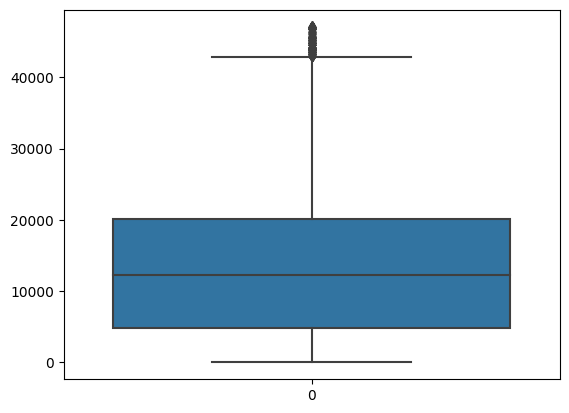

In [ ]:
sns.boxplot(df["Price"])

In [ ]:
#capping - change the outlier values to upper (or) lower limit values

df = cars_price.copy()
df.loc[(df["Price"] > upper_limit), "Price"] = upper_limit
df.loc[(df["Price"] < lower_limit), "Price"] = lower_limit

<Axes: >

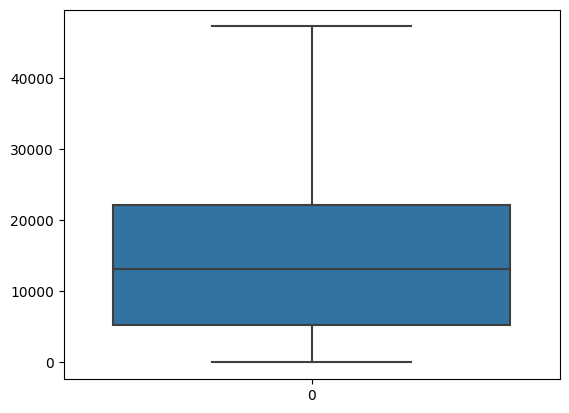

In [ ]:
sns.boxplot(df["Price"])

#Uji Statistik

Mean of Price in samples = $15874.85
Standard deviation of Price in samples = $13422.34


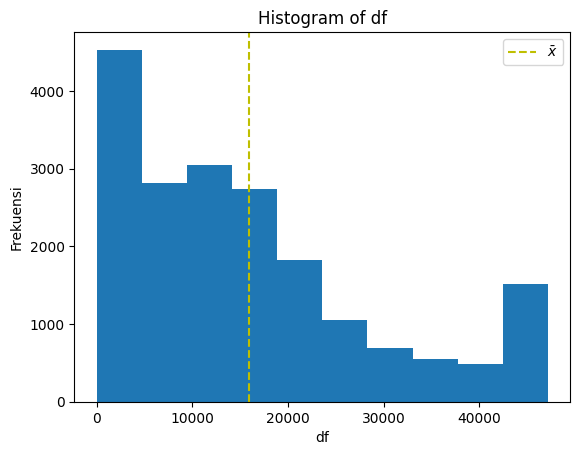

In [ ]:
plt.hist(df["Price"])

mean_df = np.mean(df["Price"])
std_df = np.std(df["Price"])

print(f"Mean of Price in samples = ${np.round(mean_df,2)}")
print(f"Standard deviation of Price in samples = ${np.round(std_df,2)}")

plt.axvline(mean_df, color ="y", linestyle = "--", label = r"$\bar{x}$")
plt.xlabel('df')
plt.ylabel('Frekuensi')
plt.title('Histogram of df')
plt.legend()
plt.show()

*   Dari histogram, banyak mobil yang dijual lebih dari 15,000. Apakah ini berarti Ho benar ?
*   Perusahaan tertarik pada harga jual rata-rata meskipun cukup banyak juga mobil yang dijual dengan harga kurang dari $15,000.

Karena kita tidak mengetahui standar deviasi populasi, maka kita menggunakan t-test.

In [ ]:
# Compute t-statistics

from scipy.stats import ttest_1samp

t_statistics, p_value = ttest_1samp(a = df["Price"], popmean=15000, alternative='greater')
print(f"t stats : {t_statistics:.4f}")
print(f"p-value : {p_value:.4f}")

t stats : 9.0399
p-value : 0.0000


In [ ]:
# find critical value to compare with t statistic test. We use 5% significance level (alpha)

import scipy.stats as stats
t_crit = stats.t.ppf(1-0.05, df = 18164 - 1)
print(t_crit)

1.6449375253902019


In [ ]:
# Decision rule based on p-value and alpha

if p_value>0.05:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the Null hypothesis")

Failed to reject the Null hypothesis


In [ ]:
# Decision rule based on critical value

if t_statistics<t_crit:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the Null hypothesis")

Failed to reject the Null hypothesis


<ipython-input-22-abd65697b21b>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


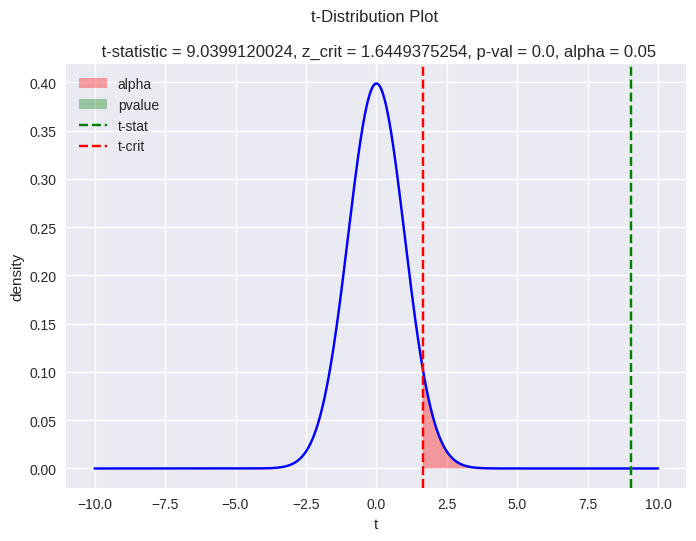

In [ ]:
# Visualization
plt.style.use('seaborn')

# plot sample distribution 
x = np.arange(-10, 10, 0.001)
plt.plot(x, stats.t.pdf(x, df = 18163 ), 
         color='blue')

# plot alpha region
x_alpha = np.arange(t_crit, 10, 0.05)
y_alpha = stats.t.pdf(x_alpha, df = 18163)
plt.fill_between(x = x_alpha, 
                 y1 = y_alpha,
                 facecolor = 'red',
                 alpha = 0.35, 
                 label = 'alpha')

# plot pvalue
x_pvalue = np.arange(t_statistics, 10, 0.05)
y_pvalue = stats.t.pdf(x_pvalue, df = 18163)
plt.fill_between(x = x_pvalue, 
                 y1 = y_pvalue,
                 facecolor = 'green',
                 alpha = 0.35, 
                 label = 'pvalue')

# plot t-crit and t-stats
plt.axvline(np.round(t_statistics, 10), 
            color ="green", 
            linestyle = "--", 
            label ="t-stat")
plt.axvline(t_crit, 
            color ="red", 
            linestyle = "--", 
            label ="t-crit")

plt.legend()
plt.xlabel("t")
plt.ylabel("density")

plt.title(f't-Distribution Plot \n\n t-statistic = {np.round(t_statistics, 10)}, z_crit = {np.round(t_crit, 10)}, p-val = {np.round(p_value, 10)}, alpha = 0.05');

**Conclusion**

p-value less than significance level (0,05) we failed to reject null Hyphotesis(𝐻0)

#Linear Regression

In [ ]:
#Tampilkan 5 data teratas
df.head()

,ID,Price,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
0,45654403,13328,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6,Automatic,4x4,Left wheel,Silver,12
1,44731507,16621,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6,Tiptronic,4x4,Left wheel,Black,8
2,45774419,8467,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4,Variator,Front,Right-hand drive,Black,2
3,45769185,3607,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4,Automatic,4x4,Left wheel,White,0
4,45809263,11726,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4,Automatic,Front,Left wheel,Silver,4


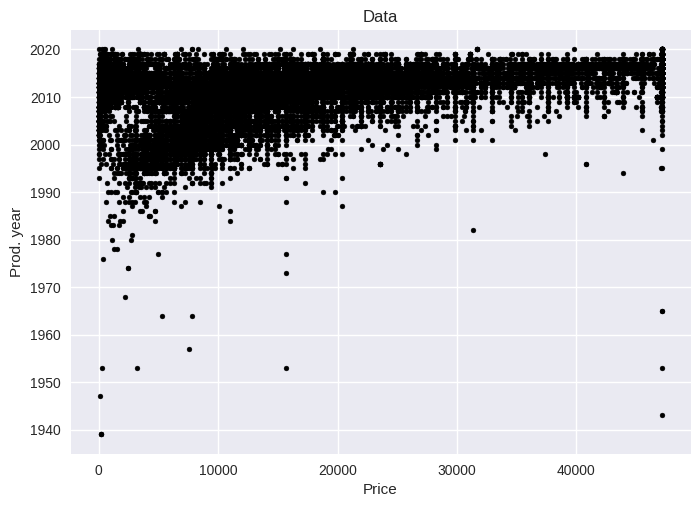

In [ ]:
x = df["Price"]
y = df["Prod. year"]

# Plot the data
plt.scatter(x, y, color = "k", marker=".")

# Add a legend and labels

plt.xlabel("Price")
plt.ylabel("Prod. year")

# Add a title and adjust the margins
plt.title("Data")

# Show the plot
plt.show()

In [ ]:
# selecting rows based on condition Prod. year > 2015
filtered_df = df[df['Prod. year'] > 2015]

# renaming column
filtered_df.rename(columns = {'Prod. year':'pyear'}, inplace = True)

filtered_df.head()

<ipython-input-25-984934492f9c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.rename(columns = {'Prod. year':'pyear'}, inplace = True)


,ID,Price,Manufacturer,Model,pyear,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
5,45802912,39493,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931 km,4,Automatic,Front,Left wheel,White,4
14,45732604,47191,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,76000 km,4,Automatic,Front,Left wheel,White,4
15,45465200,549,TOYOTA,CHR,2018,Jeep,Yes,Petrol,2,74146 km,4,Automatic,Front,Left wheel,White,12
16,45772281,7683,HYUNDAI,Elantra,2016,Sedan,Yes,Petrol,1.8,121840 km,4,Automatic,Front,Left wheel,Blue,12
17,45797221,28382,HYUNDAI,Elantra,2016,Sedan,Yes,Petrol,1.8,54317 km,4,Automatic,Front,Left wheel,White,4


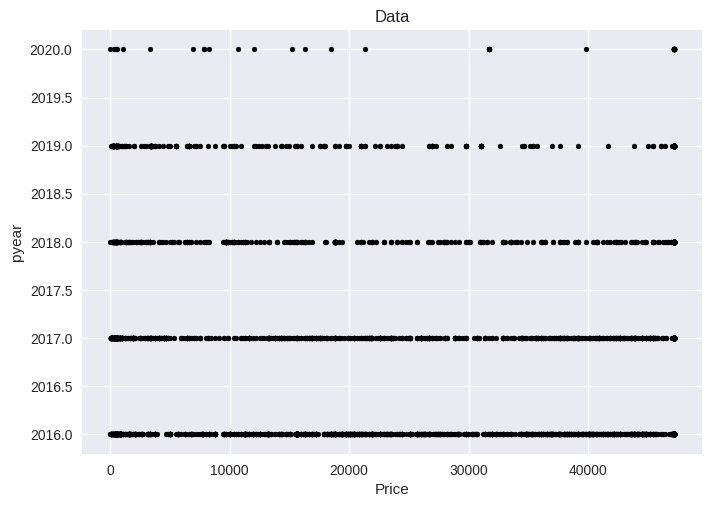

In [ ]:
x = filtered_df["Price"]
y = filtered_df["pyear"]

# Plot the data
plt.scatter(x, y, color = "k", marker=".")

# Add a legend and labels

plt.xlabel("Price")
plt.ylabel("pyear")

# Add a title and adjust the margins
plt.title("Data")

# Show the plot
plt.show()

In [ ]:
# Create OLS model object
model = smf.ols('Price ~ pyear',filtered_df)

# Fit the model
results = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_price_pyear = print_coef_std_err(results)

visualize the data and regression line

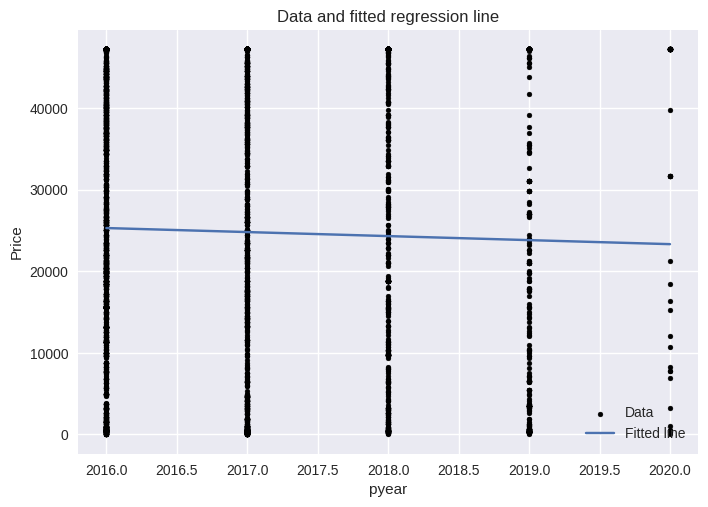

In [ ]:
predictor = "pyear"
outcome = "Price"
data = filtered_df.copy()
results_ = results_price_pyear.copy()

# Plot the data
plt.scatter(data[predictor], data[outcome], marker=".", label="Data", color = "k")

# Calculate the fitted values
a_hat = results_.loc["Intercept"]["coef"]
b_hat = results_.loc[predictor]["coef"]

x_domain = np.linspace(np.min(data[predictor]), np.max(data[predictor]), 10000)

fitted_values = a_hat + b_hat * x_domain

# Plot the fitted line
plt.plot(x_domain, fitted_values, label="Fitted line")

# Add a legend and labels
plt.legend()
plt.xlabel(f"{predictor}")
plt.ylabel(f"{outcome}")

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()

#Coefficient Interpretation

In [ ]:
results_price_pyear

,coef,std err
Intercept,1.020461e+06,581322.936910
pyear,-4.936292e+02,288.221322


- construct the regression line using the estimated coefficients
$$\hat{price} = 1,020,461 - 494 pyear$$

- the average price of car that has 0 years of production year is `$ 1,020,461` 
- the average difference in price between two cars with one year in production, is `$494`, with the car that has latest year of production have the higher price



---

